In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1pZAhb14Pnj4X2A4vHXWLOnf_zuYKjhv6"
output_file = "Rock_Paper_Scissor_Object_Detection_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1pZAhb14Pnj4X2A4vHXWLOnf_zuYKjhv6
From (redirected): https://drive.google.com/uc?id=1pZAhb14Pnj4X2A4vHXWLOnf_zuYKjhv6&confirm=t&uuid=d7ef25d8-b11b-4571-8fb7-e01c3609a6cb
To: /content/Rock_Paper_Scissor_Object_Detection_Datasets.zip
100%|██████████| 125M/125M [00:00<00:00, 167MB/s]


'Rock_Paper_Scissor_Object_Detection_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Rock_Paper_Scissor_Object_Detection_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Rock_Paper_Scissor_Object_Detection_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Rock_Paper_Scissor_Object_Detection_Datasets' to 'datasets/Rock_Paper_Scissor_Object_Detection_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Rock_Paper_Scissor_Object_Detection_Datasets',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 3,
    'names': ['Paper', 'Rock', 'Scissors']
}

# Save to pothole.yaml
with open('Rock_Paper_Scissor_Object_Detection_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Rock_Paper_Scissor_Object_Detection_Datasets.yaml created successfully!")


Rock_Paper_Scissor_Object_Detection_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint
model.train(
    data='Rock_Paper_Scissor_Object_Detection_Datasets.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='Rock_Paper_Scissor_Object_Detection_Datasets_yolov8',
    save=True,
    save_period=-1,  # Don't save every epoch
    patience=20,     # Early stopping if no improvement for 20 epochs (optional)
    val=True,     # Run validation during training to select best model


    # Data augmentation options
    degrees=10,        # Random rotation degrees
    translate=0.1,     # Random translation
    scale=0.5,         # Random scale
    shear=2.0,         # Random shear
    perspective=0.0005,# Perspective transform
    flipud=0.5,        # Vertical flip probability
    fliplr=0.5,        # Horizontal flip probability
    mosaic=1.0,        # Mosaic augmentation
    mixup=0.2,         # MixUp augmentation
    hsv_h=0.015,       # Hue augmentation
    hsv_s=0.7,         # Saturation augmentation
    hsv_v=0.4          # Value augmentation
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.0M/49.0M [00:01<00:00, 50.6MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Rock_Paper_Scissor_Object_Detection_Datasets.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Rock_Paper_Scissor_Object_Detection_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

100%|██████████| 755k/755k [00:00<00:00, 98.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  2    756736  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 385MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.6±4.7 MB/s, size: 37.5 KB)


train: Scanning /content/datasets/Rock_Paper_Scissor_Object_Detection_Datasets/train/labels... 3000 images, 1157 backgrounds, 0 corrupt: 100%|██████████| 3000/3000 [00:02<00:00, 1154.43it/s]

train: New cache created: /content/datasets/Rock_Paper_Scissor_Object_Detection_Datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.7±11.6 MB/s, size: 31.7 KB)


val: Scanning /content/datasets/Rock_Paper_Scissor_Object_Detection_Datasets/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 720.97it/s]

val: New cache created: /content/datasets/Rock_Paper_Scissor_Object_Detection_Datasets/valid/labels.cache


Plotting labels to runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       5.3G      1.979      3.482      2.223         10        640: 100%|██████████| 375/375 [02:35<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.12it/s]

                   all        576        400     0.0605     0.0758     0.0187    0.00506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.43G      2.167      3.625        2.4         15        640: 100%|██████████| 375/375 [02:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]

                   all        576        400     0.0317      0.076     0.0339     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.52G      2.154      3.681      2.371         11        640: 100%|██████████| 375/375 [02:28<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all        576        400     0.0781     0.0569     0.0245    0.00702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.62G       2.06       3.55      2.304         16        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.39it/s]

                   all        576        400      0.761     0.0306     0.0414     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.71G      1.969      3.425      2.222         17        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400     0.0292      0.106     0.0359     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.81G      1.885      3.264      2.153         12        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.60it/s]

                   all        576        400      0.279      0.159      0.118     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       6.9G      1.833      3.138      2.125         11        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]

                   all        576        400      0.245      0.234      0.199     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         7G      1.845      3.131      2.126         14        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]

                   all        576        400      0.321      0.304      0.254      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.1G        1.8       3.05      2.081         13        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]

                   all        576        400       0.23       0.34      0.213      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.19G      1.787      3.015       2.07         15        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]

                   all        576        400      0.189      0.415      0.257      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.29G      1.765      2.916       2.05         16        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400      0.351      0.309      0.286      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.38G      1.737      2.835      2.023          8        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]

                   all        576        400       0.48      0.318      0.312      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.84G      1.692      2.809      1.997         10        640: 100%|██████████| 375/375 [02:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all        576        400      0.463      0.363      0.398      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.87G      1.698      2.762       2.02          6        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]

                   all        576        400      0.368      0.456      0.425      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.87G      1.671      2.633      1.991         12        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.55it/s]

                   all        576        400      0.564      0.401      0.466      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.87G      1.671      2.656      1.977         15        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]

                   all        576        400      0.394      0.428      0.419      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.88G      1.654      2.599      1.973         12        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]

                   all        576        400      0.417      0.461      0.457      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.97G      1.665      2.605      1.967         21        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all        576        400      0.391      0.483      0.399      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.07G      1.606      2.539      1.911         17        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.57it/s]

                   all        576        400      0.458      0.501      0.496      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.17G      1.606      2.461      1.908         12        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]

                   all        576        400      0.437        0.6      0.563      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.26G      1.609      2.468      1.909         16        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400      0.501      0.523      0.537      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.36G      1.583      2.403      1.891         13        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]

                   all        576        400      0.492      0.556      0.564      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.77G      1.572       2.34      1.877          8        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]

                   all        576        400      0.554      0.605      0.616      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       6.8G      1.562      2.365      1.861         14        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]

                   all        576        400      0.671      0.517      0.609      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       6.8G      1.575      2.292      1.891         14        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]

                   all        576        400      0.586      0.532       0.59      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       6.8G      1.567      2.302      1.891         20        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.57it/s]

                   all        576        400      0.557      0.621      0.635      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.87G       1.56      2.261       1.87         12        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]

                   all        576        400       0.58      0.658      0.692       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.97G       1.53      2.245      1.848          7        640: 100%|██████████| 375/375 [02:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.58it/s]

                   all        576        400      0.539      0.619      0.604      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.07G      1.531      2.239      1.846         20        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]

                   all        576        400      0.568      0.653       0.68      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.16G      1.506      2.205      1.826         13        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400      0.632      0.613       0.69      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.26G      1.517      2.125      1.835         14        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.57it/s]

                   all        576        400      0.656      0.651      0.696      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.35G      1.495      2.134      1.813          9        640: 100%|██████████| 375/375 [02:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]

                   all        576        400      0.627      0.687      0.711      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.77G       1.51      2.127      1.818         13        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all        576        400      0.618      0.648      0.707      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.8G      1.489       2.08      1.807         16        640: 100%|██████████| 375/375 [02:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400      0.721      0.633      0.736      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       6.8G      1.498      2.081      1.804         18        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]

                   all        576        400      0.606      0.707      0.701      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       6.8G       1.48      2.042      1.796         13        640: 100%|██████████| 375/375 [02:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.54it/s]

                   all        576        400      0.682      0.647      0.713       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.87G      1.462      1.981      1.787         11        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.50it/s]

                   all        576        400       0.68       0.72      0.741      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.97G      1.424      1.956      1.749         11        640: 100%|██████████| 375/375 [02:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.49it/s]

                   all        576        400      0.676      0.741      0.756      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.07G      1.449      1.982      1.777          8        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]

                   all        576        400       0.65      0.716      0.752      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.16G      1.437      1.949      1.761         21        640: 100%|██████████| 375/375 [02:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]

                   all        576        400      0.667      0.758      0.769      0.471


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.26G      1.244      1.445      1.676          9        640: 100%|██████████| 375/375 [02:25<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.54it/s]

                   all        576        400      0.799      0.724      0.789       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.35G      1.235       1.31      1.671          9        640: 100%|██████████| 375/375 [02:24<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.55it/s]

                   all        576        400      0.711      0.743      0.781       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.76G      1.221      1.283      1.655          7        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]

                   all        576        400      0.715      0.753      0.793      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.79G      1.214       1.24      1.656          5        640: 100%|██████████| 375/375 [02:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all        576        400      0.759      0.718      0.799        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.79G      1.203      1.204      1.636          7        640: 100%|██████████| 375/375 [02:24<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.51it/s]

                   all        576        400      0.773      0.759      0.836      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.79G      1.183      1.165      1.616          8        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.55it/s]

                   all        576        400      0.788       0.76      0.838      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.87G      1.167      1.144       1.59          8        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]

                   all        576        400      0.837      0.767      0.845      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.96G      1.177       1.12        1.6          5        640: 100%|██████████| 375/375 [02:24<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]

                   all        576        400      0.825      0.781      0.853      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.06G       1.16      1.108      1.581          3        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.55it/s]

                   all        576        400      0.799      0.777      0.854      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.15G      1.147      1.084      1.583          7        640: 100%|██████████| 375/375 [02:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.52it/s]

                   all        576        400      0.806      0.798      0.854      0.551



50 epochs completed in 2.225 hours.
Optimizer stripped from runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8/weights/best.pt, 51.2MB

Validating runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.29it/s]


                   all        576        400      0.808        0.8      0.854      0.551
                 Paper        132        139      0.773      0.761      0.845      0.516
                  Rock        121        141        0.8       0.83      0.855      0.559
              Scissors        116        120      0.851       0.81      0.864      0.578
Speed: 0.2ms preprocess, 13.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79f7bb1b5790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import cv2
import numpy as np
import random

def draw_boxes(image, box, label, color_sample):

    image_with_boxes = image.copy()

    xmin, ymin, xmax, ymax = map(int, box)

    # Ensure correct indexing
    color = random.choice(color_sample)

    # Draw bounding box
    cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), color, 2)

    # Draw label text
    text = label
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_w, text_h = text_size

    # Adjust text position to prevent out-of-bounds
    ymin_text = max(ymin - text_h - 5, 0)

    # Background rectangle for text
    cv2.rectangle(image_with_boxes, (xmin, ymin_text-5), (xmin + text_w + 10, ymin), color, -1)

    # Put text on the image with white color for better visibility
    cv2.putText(
        image_with_boxes,
        text,
        (xmin + 5, ymin - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),  # White text
        2,
        cv2.LINE_AA,
    )

    return image_with_boxes


0: 640x640 1 Rock, 951.0ms
Speed: 8.0ms preprocess, 951.0ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Paper, 827.0ms
Speed: 5.4ms preprocess, 827.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Papers, 822.2ms
Speed: 5.7ms preprocess, 822.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Rocks, 823.7ms
Speed: 5.2ms preprocess, 823.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 800.8ms
Speed: 5.0ms preprocess, 800.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Paper, 1 Scissors, 810.6ms
Speed: 5.1ms preprocess, 810.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Scissors, 786.2ms
Speed: 5.2ms preprocess, 786.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Rock, 789.2ms
Speed: 5.7ms preprocess, 789.2ms inference, 1.7ms postproce

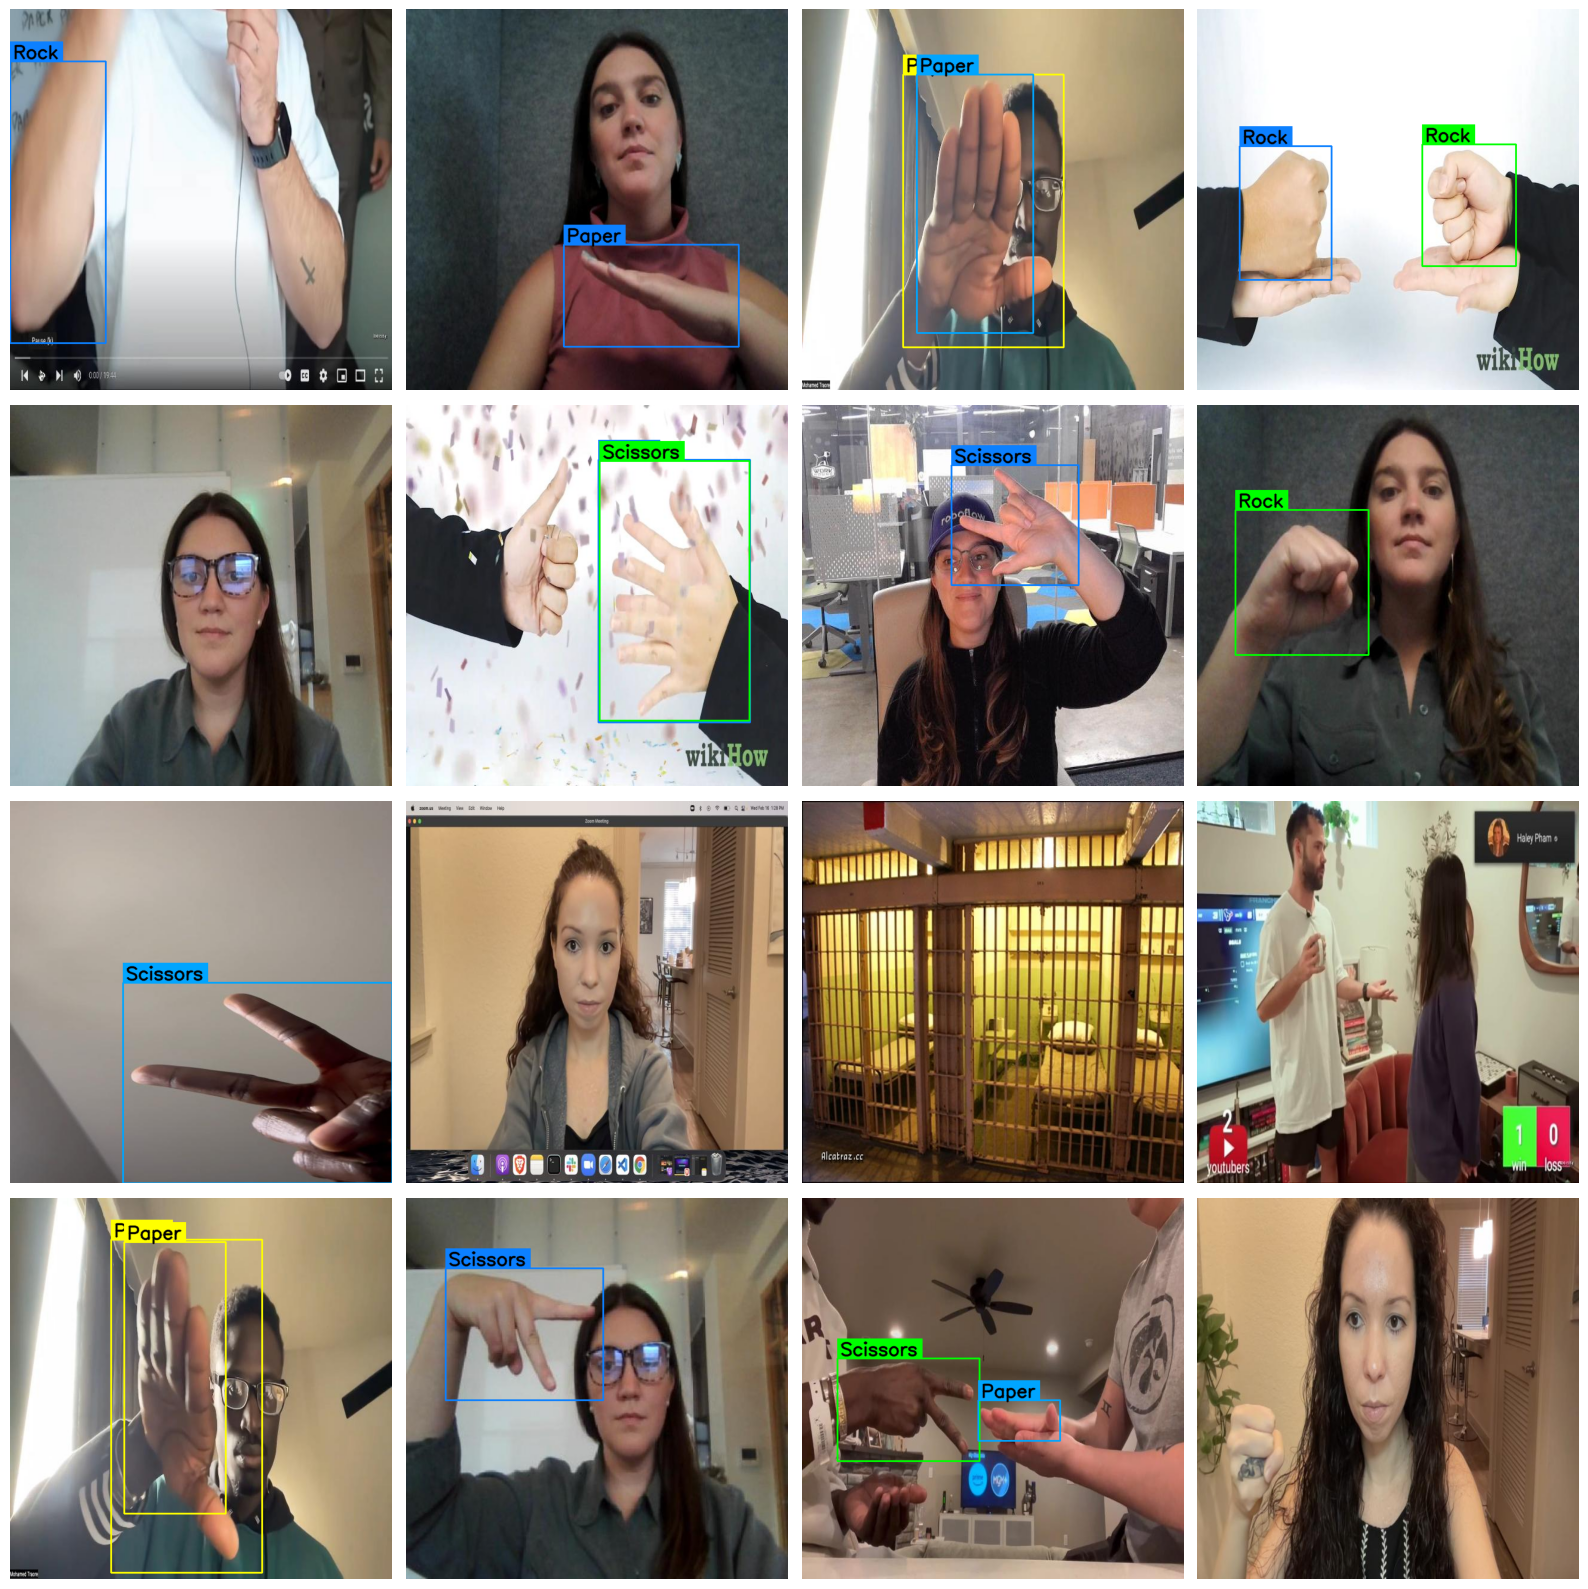

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Load trained model
# model = YOLO('runs/detect/Rock_Paper_Scissor_Object_Detection_Datasets_yolov8/weights/best.pt')
model = YOLO('rock_paper_scissor.pt')

# Test images directory
# test_images_dir = 'datasets/Rock_Paper_Scissor_Object_Detection_Datasets/test/images'
test_images_dir = 'Rock_Paper_Scissor_Object_Detection_Datasets/test/images'

color_sample = [
    (12, 128, 255),   # Orange-ish
    (255, 0, 127),    # Pink
    (0, 255, 0),      # Green
    (255, 255, 0),    # Cyan
    (0, 165, 255)     # Blue-ish
]

# Get list of test images (max 16)
image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = Image.open(img_path)

    # Inference
    results = model(image)[0]  # Get first result (one image)

    image = np.array(image)

    # Draw each box if confidence > 0.8
    for box in results.boxes:

        xyxy = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        image = draw_boxes(image, xyxy, label, color_sample)

    # Plot
    ax[idx].imshow(image)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
